## 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Data Wrangling
#### 3. Decomposing Time-Series Data
#### 4. Stationarity Test

### 1. Importing Libraries and Data

In [1]:
# Using .api to import public access version of statsmodels, a library that handles statistical models
# Using last library to handle warnings

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

# Disabling deprecation warnings that could indicate, for instance, a suspended library or feature; not task-relevant

warnings.filterwarnings("ignore") 

# Choosing styling option for how plots will appear

plt.style.use('fivethirtyeight')

In [2]:
# Define path

path = 'C:/Users/iryna/Documents/Data analytics/Career foundry/6. Advanced Analytics & Dashboard Design/09-2022 World Happiness Analysis'

In [3]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hap_full_categor.csv'))

### 2. Data Wrangling

In [4]:
# Checking shape
df.shape

(1229, 15)

In [5]:
# Checking headers
pd.options.display.max_columns = None
df.head()

,Unnamed: 0,country,region_id,region,Year,happiness_rank,happiness_score,economy_GDP_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,dystopia_residual,happiness_category
0,0,Switzerland,WE,Western Europe,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,high
1,1,Iceland,WE,Western Europe,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,high
2,2,Denmark,WE,Western Europe,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,high
3,3,Norway,WE,Western Europe,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,high
4,4,Canada,NAANZ,North America and ANZ,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,high


In [6]:
# Creating a new dataframe with median happiness score grouped by years
data = df.groupby('Year').agg({'happiness_score': ['median']})

In [8]:
# Checking headers
data

,happiness_score
,median
Year,
2015,5.2325
2016,5.3140
2017,5.2790
2018,5.3780
2019,5.3795
2020,5.5150
2021,5.5340
2022,5.5780


In [9]:
# Checking data types
data.dtypes

happiness_score  median    float64
dtype: object

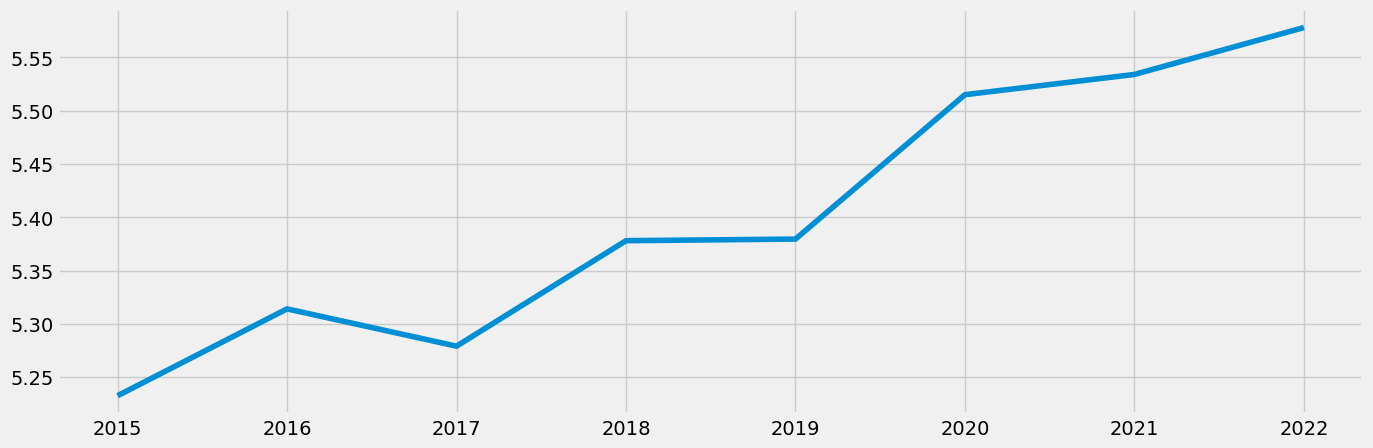

In [10]:
# Plotting the data using matplotlib
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

### 3. Decomposing Time-Series Data

In [11]:
# Decomposing time series using 
decomp = sm.tsa.seasonal_decompose(data, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

### 4. Stationarity Test

In [12]:
# The adfuller() function imports from the model from statsmodels; but running it will only return an array of numbers
# This is the reason to define a function that prints the correct output from that array

# Importing the adfuller() function

from statsmodels.tsa.stattools import adfuller 

# Performing the Dickey-Fuller test:

def dickey_fuller(timeseries): # Define the function
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['price'])

KeyError: 'price'